# Задание.  
## Домашнее задание к лекции «Задачи классификации и кластеризации»

Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)  
Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety  
Разделите данные на выборку для обучения и тестирования   
Постройте модель LDA   
Визуализируйте предсказания для тестовой выборки и центры классов   
Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width   
Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию  

In [82]:
# загружаем библиотеки и датасет
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 16,7

from matplotlib import colors
iris = load_iris()
# print(iris.DESCR)

In [60]:
# загружаем данные в датафрейм
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [69]:
# оставляем только признаки с чашелистиками
data = data.iloc[:, [0, 1]]
data.columns = ['sepal_length', 'sepal_width']
data.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [70]:
# загружаем целевую переменную
variety = iris.target
variety

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Модель LDA

In [71]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, variety, test_size=0.25)

In [72]:
# проверяем кол-во наблюдений в тестовой выборке
len(y_test)

38

In [73]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [74]:
lda = LinearDiscriminantAnalysis()

In [76]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [77]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([2, 1, 0, 2, 2, 2, 2, 1, 1, 0, 1, 0, 2, 2, 2, 0, 0, 2, 2, 1, 0, 0,
       2, 0, 0, 2, 2, 2, 0, 0, 1, 1, 0, 0, 2, 1, 1, 1])

In [78]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [79]:
result.columns = ['test_data', 'predict_data']
result

,test_data,predict_data
0,2,2
1,1,1
2,0,0
3,2,2
4,2,2
5,2,2
6,2,2
7,1,1
8,2,1
9,0,0


In [90]:
# найдем центры классов в соответствии с моделью LDA
lda.means_

array([[4.97297297, 3.39459459],
       [5.89142857, 2.79714286],
       [6.57      , 2.9575    ]])

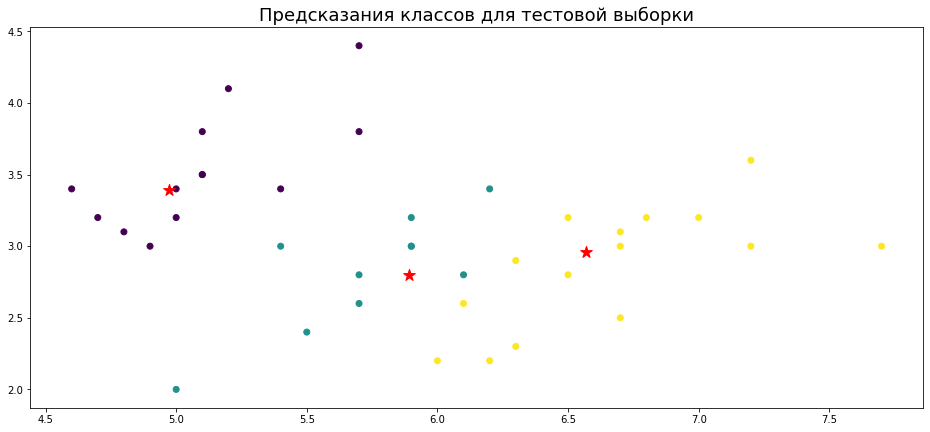

In [94]:
# визуализируем предсказания для тестовой выборки
plt.scatter(x=X_test['sepal_length'], y=X_test['sepal_width'], c=lda.predict(X_test))
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')
plt.title('Предсказания классов для тестовой выборки', fontsize = 18)
plt.show()

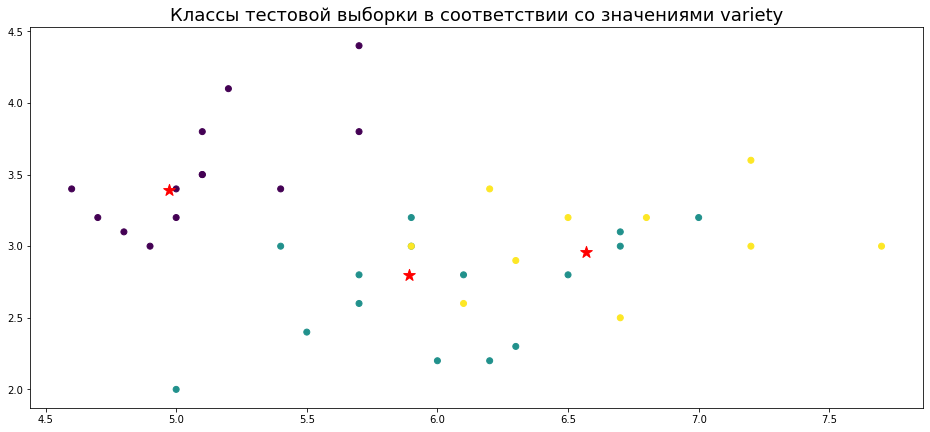

In [95]:
# визуализируем классы в соответствии с исходными данными
plt.scatter(x=X_test['sepal_length'], y=X_test['sepal_width'], c=y_test)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')
plt.title('Классы тестовой выборки в соответствии со значениями variety', fontsize = 18)
plt.show()

При сравнении графиков видно, что наша модель не всегда правильно предсказывает разнесение объектов между 2 и 3 классами.  
Правильные ответы она дает в 76 % случаев (accuracy_score).   
По идее, для повышения точности нужно либо увеличивать общее число наблюдений, либо увеличивать число параметров. В исходном датасете, помимо чашелистиков, есть еще замеры лепестков. Если построить модель lda на всех 4-х параметрах, то accuracy_score = 1. Только непонятно, возможно ли построение графиков при таком раскладе, 4 оси как-то многовато для двумерного пространства :(. 

In [85]:
# точность - полученная модель правильно предсказывает класс объектов примерно в 76 % случаев
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7631578947368421

## Кластерный анализ

In [111]:
# вспоминаем наш исходный датасет с двумя переменными
data.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [112]:
# приводим данные к единому масштабу
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled

array([[-0.90068117,  1.01900435],
       [-1.14301691, -0.13197948],
       [-1.38535265,  0.32841405],
       [-1.50652052,  0.09821729],
       [-1.02184904,  1.24920112],
       [-0.53717756,  1.93979142],
       [-1.50652052,  0.78880759],
       [-1.02184904,  0.78880759],
       [-1.74885626, -0.36217625],
       [-1.14301691,  0.09821729],
       [-0.53717756,  1.47939788],
       [-1.26418478,  0.78880759],
       [-1.26418478, -0.13197948],
       [-1.87002413, -0.13197948],
       [-0.05250608,  2.16998818],
       [-0.17367395,  3.09077525],
       [-0.53717756,  1.93979142],
       [-0.90068117,  1.01900435],
       [-0.17367395,  1.70959465],
       [-0.90068117,  1.70959465],
       [-0.53717756,  0.78880759],
       [-0.90068117,  1.47939788],
       [-1.50652052,  1.24920112],
       [-0.90068117,  0.55861082],
       [-1.26418478,  0.78880759],
       [-1.02184904, -0.13197948],
       [-1.02184904,  0.78880759],
       [-0.7795133 ,  1.01900435],
       [-0.7795133 ,

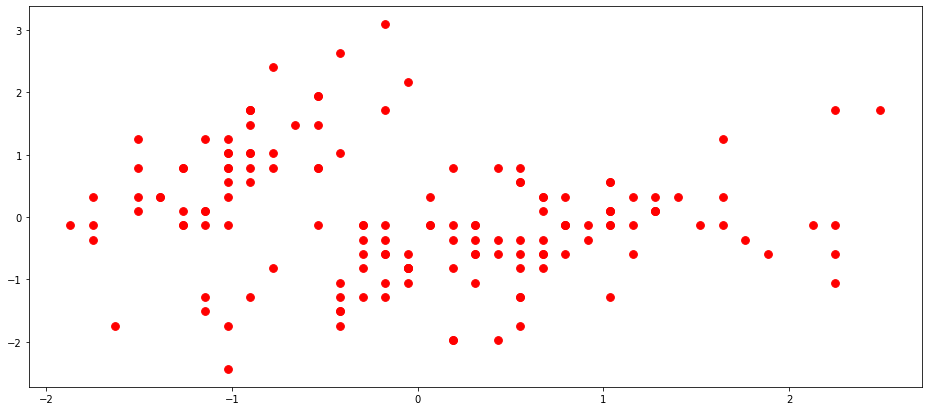

In [118]:
# примерно так это будет выглядеть на графике
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], color='red', s=60)

In [104]:
# Определяем оптимальное число классов визуально по графику локтя
# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(2, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(data_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

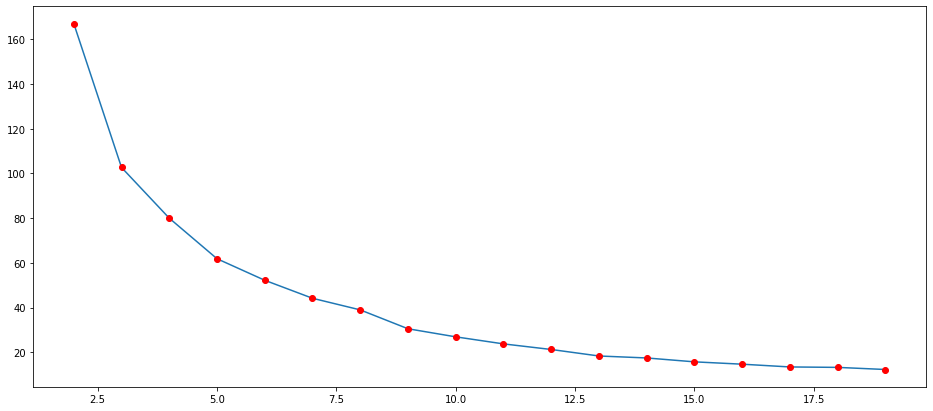

In [105]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

Если смотреть на график локтя, то наибольшая разница между 2 и 3 кластерами, более-менее график сглаживается где-то после 5  кластеров. Но в нашем датасете всего 150 наблюдений, разбивать их на большое число групп, наверное, не очень правильно.   
И я уже заранее знаю, что есть 3 класса с цветами ирисов. Поэтому пусть кластеров будет 3 :) 

In [120]:
from sklearn.cluster import KMeans
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(data_scaled)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

Text(0.5, 1.0, 'Визуализация разделения данных на 3 кластера')

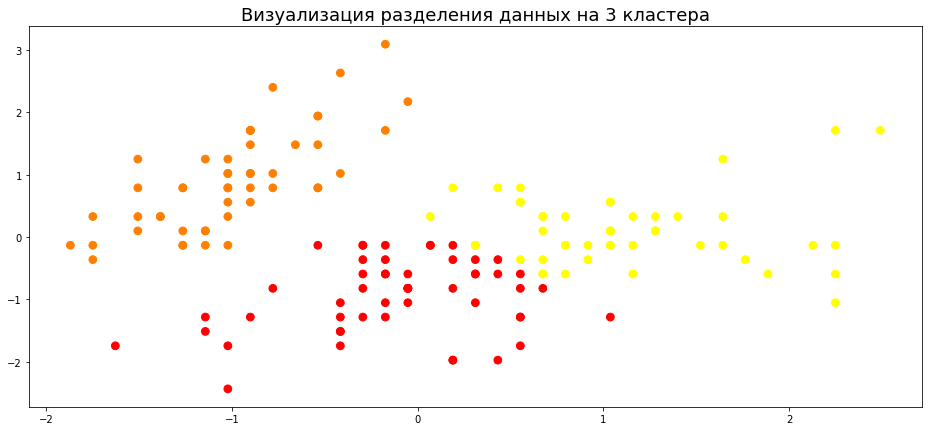

In [124]:
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], cmap='autumn', c=clusters, s=60)
plt.title('Визуализация разделения данных на 3 кластера', fontsize = 18)

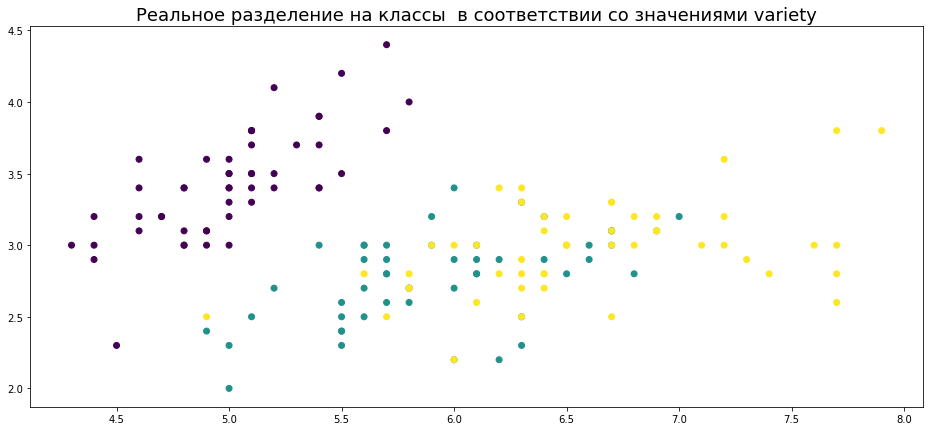

In [127]:
# для справки смотрим, как бьются на группы исходные данные
plt.scatter(x=data['sepal_length'], y=data['sepal_width'], c=variety)
plt.title('Реальное разделение на классы  в соответствии со значениями variety', fontsize = 18)
plt.show()

В общем, вывод по итогам кластерного анализа примерно такой же, как и в случае LDA: двух параметров - длины и ширины чашелистиков - явно недостаточно для нормального разбиения цветков ириса на классы.   